In [1]:
from F_Slices_Functions import *
from PIL import Image, ImageOps # load and show an image with Pillow
from numpy import asarray
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv
from scipy.stats import beta # Distribution type
from sklearn import preprocessing # Normalization

In [2]:
#-------- This is the proposed LAB Alogirthm 
def Potential_Values_with_Fluorescence(img_flattened, control_flattened):
    control_mean, control_std = Calculate_Mean_SD(control_flattened,"Control")
    #--------------------------------------- original image values of interest
    list_values_of_interest_original = []
    for i in range(0,len(img_flattened)):
        if(img_flattened[i]>control_mean+2*control_std):
            list_values_of_interest_original.append(img_flattened[i])
    list_values_of_interest_original = np.array(list_values_of_interest_original)
    print("Potential Values with Fluorescence from the Original Image:",list_values_of_interest_original.shape)
    #--------------------------------------- control image values of interest
    list_values_of_interest_control = []
    for i in range(0,len(control_flattened)):
        if(control_flattened[i]>control_mean+2*control_std):
            list_values_of_interest_control.append(control_flattened[i])
    list_values_of_interest_control = np.array(list_values_of_interest_control)
    print("Potential Values with Fluorescence from the Control Image:",list_values_of_interest_control.shape)
    #--------------------------------------- remove control potential values from original image
    list_values_of_interest = Delete_Values_Array_From_Another(list_values_of_interest_original,list_values_of_interest_control)
    list_values_of_interest = np.array(list_values_of_interest)
    print("Potential Values with Fluorescence:",list_values_of_interest.shape)
    return list_values_of_interest

Original Image Shape: (398, 334, 4)
Gray Original Image Shape: (398, 334)
Gray Image Resized Shape:  (119, 100)
Gray Image Resized Flattend Shape:  (11900,)
Original Image Shape: (53, 62, 4)
Gray Original Image Shape: (53, 62)
Gray Image Resized Shape:  (15, 18)
Gray Image Resized Flattend Shape:  (270,)
Mean Control: 27.366666666666667
SD Control: 2.2906411846985195
Potential Values with Fluorescence from the Original Image: (1085,)
Potential Values with Fluorescence from the Control Image: (15,)
Potential Values with Fluorescence: (1070,)


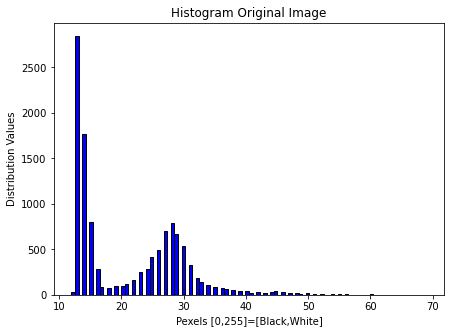

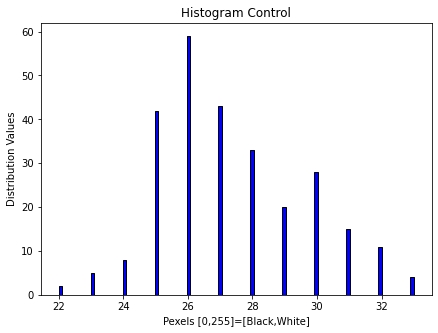

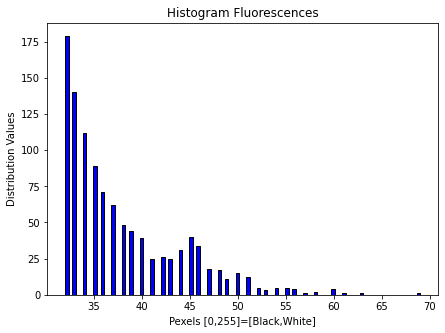

Mean Control: 27.366666666666667
SD Control: 2.2906411846985195
Mean Fluorescence: 37.84859813084112
SD Fluorescence: 6.048207651178339
Successful Delivery


In [3]:
img, img_flattened = Read_Image_Gray_Down_Scale("D:/Ultrasound/Slices-Images/2019_02_04-M08-6.png", 30)
img_control, img_flattened_control = Read_Image_Gray_Down_Scale("D:/Ultrasound/Slices-Images/2019_02_04-M08-6-control.png", 30)
fluorescence_values = Potential_Values_with_Fluorescence(img_flattened,img_flattened_control)

Plot_Basic_Histogram(img_flattened,"Original Image","Distribution Values","Pexels [0,255]=[Black,White]")
Plot_Basic_Histogram(img_flattened_control,"Control","Distribution Values","Pexels [0,255]=[Black,White]")
Plot_Basic_Histogram(fluorescence_values,"Fluorescences","Distribution Values","Pexels [0,255]=[Black,White]")

img_mean_control, img_std_control = Calculate_Mean_SD(img_flattened_control,"Control")
fluorescence_values_mean, fluorescence_values_std = Calculate_Mean_SD(fluorescence_values,"Fluorescence")

if(fluorescence_values_mean>img_mean_control+img_std_control):
    print("Successful Delivery")
else:
    print("Not Successful Delivery")

In [5]:
for i in range(1,5):
    img, img_flattened = Read_Image_Gray_Down_Scale("D:/Ultrasound/Slices-Images/2019_02_04-M08-"+str(i)+".png", 20)
    img_control, img_flattened_control = Read_Image_Gray_Down_Scale("D:/Ultrasound/Slices-Images/2019_02_04-M08-"+str(i)+"-control.png", 20)
    fluorescence_values = Potential_Values_with_Fluorescence(img_flattened,img_flattened_control)
    
    img_mean_control, img_std_control = Calculate_Mean_SD(img_flattened_control,"Control")
    fluorescence_values_mean, fluorescence_values_std = Calculate_Mean_SD(fluorescence_values,"Fluorescence")
    if(fluorescence_values_mean>img_mean_control+img_std_control):
        print("------------------------------------------------Successful Delivery")
    else:
        print("------------------------------------------------Not Successful Delivery")

Original Image Shape: (410, 283, 4)
Gray Original Image Shape: (410, 283)
Gray Image Resized Shape:  (82, 56)
Gray Image Resized Flattend Shape:  (4592,)
Original Image Shape: (24, 28, 4)
Gray Original Image Shape: (24, 28)
Gray Image Resized Shape:  (4, 5)
Gray Image Resized Flattend Shape:  (20,)
Mean Control: 47.7
SD Control: 4.561797891182817
Potential Values with Fluorescence from the Original Image: (6,)
Potential Values with Fluorescence from the Control Image: (1,)
Potential Values with Fluorescence: (6,)
Mean Control: 47.7
SD Control: 4.561797891182817
Mean Fluorescence: 60.833333333333336
SD Fluorescence: 2.1147629234082532
------------------------------------------------Successful Delivery
Original Image Shape: (468, 314, 4)
Gray Original Image Shape: (468, 314)
Gray Image Resized Shape:  (93, 62)
Gray Image Resized Flattend Shape:  (5766,)
Original Image Shape: (40, 64, 4)
Gray Original Image Shape: (40, 64)
Gray Image Resized Shape:  (8, 12)
Gray Image Resized Flattend Sha

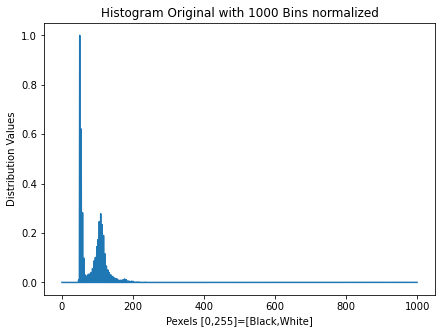

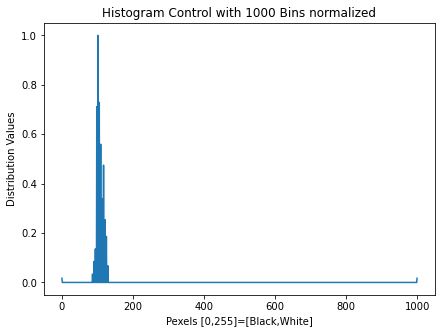

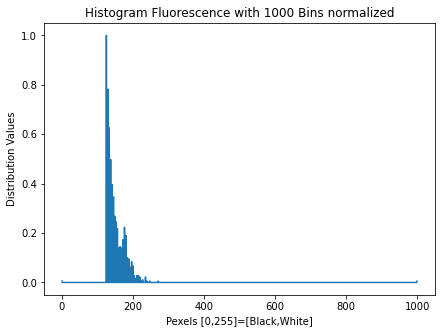

In [4]:
img_flattened = Add_Black_White_Limits(img_flattened)
img_flattened_control = Add_Black_White_Limits(img_flattened_control)
fluorescence_values = Add_Black_White_Limits(fluorescence_values)

#------------------------------------------------------------------- Histograms & Normalization
img_flattened_hist, _ = np.histogram(img_flattened, bins=1000)
img_flattened_hist_normalized = Normalization_of_List(img_flattened_hist)
Plot_Basic(img_flattened_hist_normalized,"Histogram Original with 1000 Bins normalized","Distribution Values","Pexels [0,255]=[Black,White]")

img_flattened_control_hist, _ = np.histogram(img_flattened_control, bins=1000)
img_flattened_control_hist_normalized = Normalization_of_List(img_flattened_control_hist)
Plot_Basic(img_flattened_control_hist_normalized,"Histogram Control with 1000 Bins normalized","Distribution Values","Pexels [0,255]=[Black,White]")

fluorescence_values_hist, _ = np.histogram(fluorescence_values, bins=1000)
fluorescence_values_hist_normalized = Normalization_of_List(fluorescence_values_hist)
Plot_Basic(fluorescence_values_hist_normalized,"Histogram Fluorescence with 1000 Bins normalized","Distribution Values","Pexels [0,255]=[Black,White]")

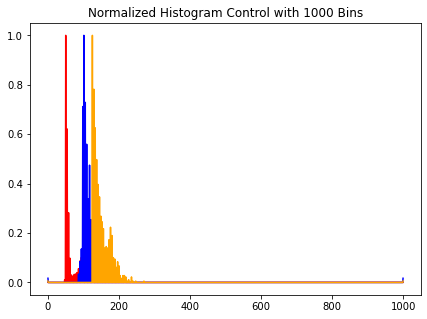

In [5]:
# matplotlib histogram
plt.figure(1, figsize=(7,5))
plt.plot(img_flattened_hist_normalized, 'red')
plt.plot(img_flattened_control_hist_normalized, 'blue')
plt.plot(fluorescence_values_hist_normalized, 'orange')
plt.title("Normalized Histogram Control with 1000 Bins")
plt.show()